In [1]:
from sklearn import datasets, model_selection, svm, metrics

mnist = datasets.load_digits()

In [2]:
mnist.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
mnist.data.shape

(1797, 64)

In [4]:
mnist.target.shape

(1797,)

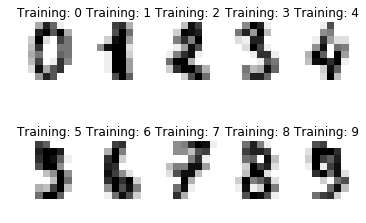

In [5]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(mnist.images, mnist.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % label)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=0)

In [7]:
x_train

array([[  0.,   3.,  13., ...,  12.,   9.,   1.],
       [  0.,   0.,   1., ...,  13.,   1.,   0.],
       [  0.,   0.,   4., ...,   9.,   0.,   0.],
       ..., 
       [  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.],
       [  0.,   0.,   6., ...,  11.,   0.,   0.]])

In [8]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=-1) # cvってなんぞ
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
# 結構時間かかる（当然だが
grid.score(x_train, y_train)

1.0

In [10]:
grid.score(x_test, y_test)

0.99333333333333329

In [11]:
"best params: {}".format(grid.best_params_)

"best params: {'C': 10, 'gamma': 0.001}"

In [12]:
"best score: {}".format(grid.best_score_)

'best score: 0.991833704528582'

### grid.score()の結果とgrid.best_score_の値が違う

- score()は訓練セット全体を用いて訓練したモデルの結果
- best_score_は訓練セットに対する交差検証の平均交差検証精度

よって違うのは当然

In [13]:
print(mnist.target[-10:])# 正解
print(grid.predict(mnist.data[-10:])) # 予測

[5 4 8 8 4 9 0 8 9 8]
[5 4 8 8 4 9 0 8 9 8]


## 可視化

In [14]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
display(results.head())

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.301266,0.044493,0.106162,0.106162,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",11,0.105839,0.106244,...,0.107011,0.105948,0.104869,0.106481,0.106061,0.106187,0.006004,0.006067,0.000803,0.000201
1,0.279493,0.037875,0.106162,0.106162,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",11,0.105839,0.106244,...,0.107011,0.105948,0.104869,0.106481,0.106061,0.106187,0.001997,0.001503,0.000803,0.000201
2,0.293346,0.042429,0.106162,0.106162,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",11,0.105839,0.106244,...,0.107011,0.105948,0.104869,0.106481,0.106061,0.106187,0.002392,0.002838,0.000803,0.000201
3,0.261380,0.034634,0.106162,0.106162,0.001,1,"{'C': 0.001, 'gamma': 1}",11,0.105839,0.106244,...,0.107011,0.105948,0.104869,0.106481,0.106061,0.106187,0.003163,0.001696,0.000803,0.000201
4,0.243782,0.033573,0.106162,0.106162,0.001,10,"{'C': 0.001, 'gamma': 10}",11,0.105839,0.106244,...,0.107011,0.105948,0.104869,0.106481,0.106061,0.106187,0.007152,0.001482,0.000803,0.000201


## metrics.confusion_matrixについて

行が正解のy_testで列が予測したy_pred
参考: https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1



In [16]:
from sklearn import metrics
y_pred = grid.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.98      1.00      0.99        43
          2       1.00      1.00      1.00        44
          3       1.00      1.00      1.00        45
          4       1.00      1.00      1.00        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      1.00      1.00        48
          8       1.00      0.98      0.99        48
          9       0.98      0.98      0.98        47

avg / total       0.99      0.99      0.99       450

